In [1]:
options(warn=-1)

In [2]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(grafify)
library(patchwork)
library(facefuns)
library(ggiraphExtra)
library(RColorBrewer)

#### Figure 6

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.


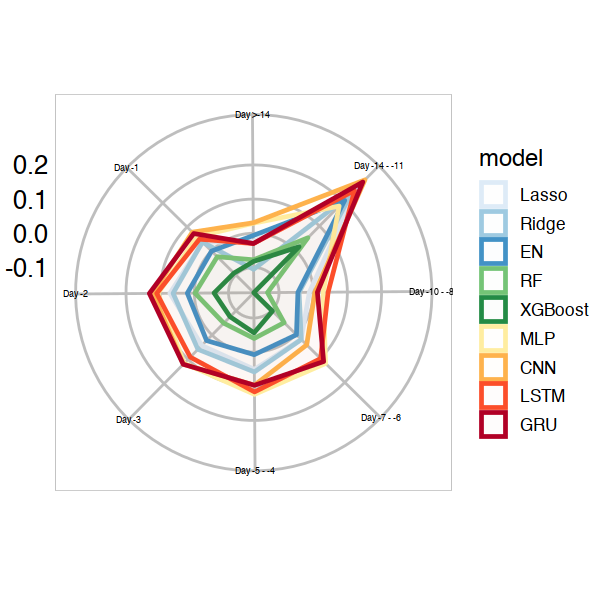

In [4]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=15),
    axis.text.y = element_text(colour = "black", size = 15, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 5, angle = 0, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.grid.major = element_line(colour = "grey", size = 0.6),
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.05),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results2_1031.csv', sep = ",", header = T, row.names = NULL)
data <- data %>% filter(para == 'whole_spc+weight+cells+conductivity+parity')
data <- subset(data, select = c(Accuracy, model, day))
colnames(data) <- c('value', 'model', 'day')
data <- data %>% group_by(model, day) %>% 
  summarise(mean=mean(value))

data_14 <- data %>% filter(day == 'Day >-14')
data_14$mean = (data_14$mean - data_14[data_14$model == 'PLS-DA', 'mean', drop = TRUE])/data_14[data_14$model == 'PLS-DA', 'mean', drop = TRUE] 
data_14 <- data_14 %>% filter(model != 'PLS-DA')
data_14 <- subset(data_14, select = c(model, mean))
colnames(data_14) <- c('model', 'value')
data_14$group <- 'Day >-14'

data_11 <- data %>% filter(day == 'Day -14 - -11')
data_11$mean = (data_11$mean - data_11[data_11$model == 'PLS-DA', 'mean', drop = TRUE])/data_11[data_11$model == 'PLS-DA', 'mean', drop = TRUE] 
data_11 <- data_11 %>% filter(model != 'PLS-DA')
data_11 <- subset(data_11, select = c(model, mean))
colnames(data_11) <- c('model', 'value')
data_11$group <- 'Day -14 - -11'

data_8 <- data %>% filter(day == 'Day -10 - -8')
data_8$mean = (data_8$mean - data_8[data_8$model == 'PLS-DA', 'mean', drop = TRUE])/data_8[data_8$model == 'PLS-DA', 'mean', drop = TRUE] 
data_8 <- data_8 %>% filter(model != 'PLS-DA')
data_8 <- subset(data_8, select = c(model, mean))
colnames(data_8) <- c('model', 'value')
data_8$group <- 'Day -10 - -8'

data_6 <- data %>% filter(day == 'Day -7 - -6')
data_6$mean = (data_6$mean - data_6[data_6$model == 'PLS-DA', 'mean', drop = TRUE])/data_6[data_6$model == 'PLS-DA', 'mean', drop = TRUE] 
data_6 <- data_6 %>% filter(model != 'PLS-DA')
data_6 <- subset(data_6, select = c(model, mean))
colnames(data_6) <- c('model', 'value')
data_6$group <- 'Day -7 - -6'

data_4 <- data %>% filter(day == 'Day -5 - -4')
data_4$mean = (data_4$mean - data_4[data_4$model == 'PLS-DA', 'mean', drop = TRUE])/data_4[data_4$model == 'PLS-DA', 'mean', drop = TRUE] 
data_4 <- data_4 %>% filter(model != 'PLS-DA')
data_4 <- subset(data_4, select = c(model, mean))
colnames(data_4) <- c('model', 'value')
data_4$group <- 'Day -5 - -4'

data_3 <- data %>% filter(day == 'Day -3')
data_3$mean = (data_3$mean - data_3[data_3$model == 'PLS-DA', 'mean', drop = TRUE])/data_3[data_3$model == 'PLS-DA', 'mean', drop = TRUE] 
data_3 <- data_3 %>% filter(model != 'PLS-DA')
data_3 <- subset(data_3, select = c(model, mean))
colnames(data_3) <- c('model', 'value')
data_3$group <- 'Day -3'

data_2 <- data %>% filter(day == 'Day -2')
data_2$mean = (data_2$mean - data_2[data_2$model == 'PLS-DA', 'mean', drop = TRUE])/data_2[data_2$model == 'PLS-DA', 'mean', drop = TRUE] 
data_2 <- data_2 %>% filter(model != 'PLS-DA')
data_2 <- subset(data_2, select = c(model, mean))
colnames(data_2) <- c('model', 'value')
data_2$group <- 'Day -2'

data_1 <- data %>% filter(day == 'Day -1')
data_1$mean = (data_1$mean - data_1[data_1$model == 'PLS-DA', 'mean', drop = TRUE])/data_1[data_1$model == 'PLS-DA', 'mean', drop = TRUE] 
data_1 <- data_1 %>% filter(model != 'PLS-DA')
data_1 <- subset(data_1, select = c(model, mean))
colnames(data_1) <- c('model', 'value')
data_1$group <- 'Day -1'

data <- rbind(data_14, data_11, data_8, data_6, data_4, data_3, data_2, data_1)
data$group <- factor(data$group, levels=c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1"))
data$model <- factor(data$model, levels=c('Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data, aes(x = group, y = value, color = model, group = model)) +
  geom_polygon(aes(fill = model), size = 1, alpha = 0.01, linewidth = 1) + 
  coord_radar(start = -0.40) +  
  scale_fill_manual(values=c('#DEEBF7', '#9ECAE1', '#4292C6', '#74C476', '#238B45', '#FFEDA0', '#FEB24C', '#FC4E2A', '#B10026')) + 
  scale_color_manual(values=c('#DEEBF7', '#9ECAE1', '#4292C6', '#74C476', '#238B45', '#FFEDA0', '#FEB24C', '#FC4E2A', '#B10026')) + 
  main_theme

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.


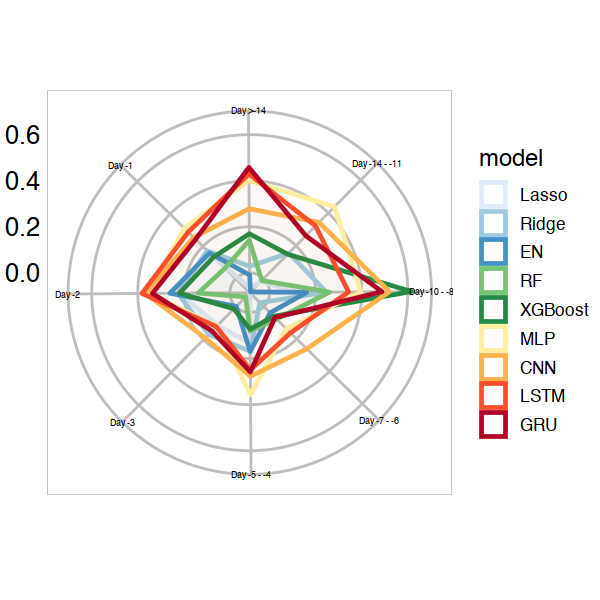

In [5]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=15),
    axis.text.y = element_text(colour = "black", size = 15, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 5, angle = 0, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.grid.major = element_line(colour = "grey", size = 0.6),
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.05),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results2_1031.csv', sep = ",", header = T, row.names = NULL)
data <- data %>% filter(para == 'whole_spc+weight+cells+conductivity+parity')
data <- subset(data, select = c(Sensitivity, model, day))
colnames(data) <- c('value', 'model', 'day')
data <- data %>% group_by(model, day) %>% 
  summarise(mean=mean(value))

data_14 <- data %>% filter(day == 'Day >-14')
data_14$mean = (data_14$mean - data_14[data_14$model == 'PLS-DA', 'mean', drop = TRUE])/data_14[data_14$model == 'PLS-DA', 'mean', drop = TRUE] 
data_14 <- data_14 %>% filter(model != 'PLS-DA')
data_14 <- subset(data_14, select = c(model, mean))
colnames(data_14) <- c('model', 'value')
data_14$group <- 'Day >-14'

data_11 <- data %>% filter(day == 'Day -14 - -11')
data_11$mean = (data_11$mean - data_11[data_11$model == 'PLS-DA', 'mean', drop = TRUE])/data_11[data_11$model == 'PLS-DA', 'mean', drop = TRUE] 
data_11 <- data_11 %>% filter(model != 'PLS-DA')
data_11 <- subset(data_11, select = c(model, mean))
colnames(data_11) <- c('model', 'value')
data_11$group <- 'Day -14 - -11'

data_8 <- data %>% filter(day == 'Day -10 - -8')
data_8$mean = (data_8$mean - data_8[data_8$model == 'PLS-DA', 'mean', drop = TRUE])/data_8[data_8$model == 'PLS-DA', 'mean', drop = TRUE] 
data_8 <- data_8 %>% filter(model != 'PLS-DA')
data_8 <- subset(data_8, select = c(model, mean))
colnames(data_8) <- c('model', 'value')
data_8$group <- 'Day -10 - -8'

data_6 <- data %>% filter(day == 'Day -7 - -6')
data_6$mean = (data_6$mean - data_6[data_6$model == 'PLS-DA', 'mean', drop = TRUE])/data_6[data_6$model == 'PLS-DA', 'mean', drop = TRUE] 
data_6 <- data_6 %>% filter(model != 'PLS-DA')
data_6 <- subset(data_6, select = c(model, mean))
colnames(data_6) <- c('model', 'value')
data_6$group <- 'Day -7 - -6'

data_4 <- data %>% filter(day == 'Day -5 - -4')
data_4$mean = (data_4$mean - data_4[data_4$model == 'PLS-DA', 'mean', drop = TRUE])/data_4[data_4$model == 'PLS-DA', 'mean', drop = TRUE] 
data_4 <- data_4 %>% filter(model != 'PLS-DA')
data_4 <- subset(data_4, select = c(model, mean))
colnames(data_4) <- c('model', 'value')
data_4$group <- 'Day -5 - -4'

data_3 <- data %>% filter(day == 'Day -3')
data_3$mean = (data_3$mean - data_3[data_3$model == 'PLS-DA', 'mean', drop = TRUE])/data_3[data_3$model == 'PLS-DA', 'mean', drop = TRUE] 
data_3 <- data_3 %>% filter(model != 'PLS-DA')
data_3 <- subset(data_3, select = c(model, mean))
colnames(data_3) <- c('model', 'value')
data_3$group <- 'Day -3'

data_2 <- data %>% filter(day == 'Day -2')
data_2$mean = (data_2$mean - data_2[data_2$model == 'PLS-DA', 'mean', drop = TRUE])/data_2[data_2$model == 'PLS-DA', 'mean', drop = TRUE] 
data_2 <- data_2 %>% filter(model != 'PLS-DA')
data_2 <- subset(data_2, select = c(model, mean))
colnames(data_2) <- c('model', 'value')
data_2$group <- 'Day -2'

data_1 <- data %>% filter(day == 'Day -1')
data_1$mean = (data_1$mean - data_1[data_1$model == 'PLS-DA', 'mean', drop = TRUE])/data_1[data_1$model == 'PLS-DA', 'mean', drop = TRUE] 
data_1 <- data_1 %>% filter(model != 'PLS-DA')
data_1 <- subset(data_1, select = c(model, mean))
colnames(data_1) <- c('model', 'value')
data_1$group <- 'Day -1'

data <- rbind(data_14, data_11, data_8, data_6, data_4, data_3, data_2, data_1)
data$group <- factor(data$group, levels=c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1"))
data$model <- factor(data$model, levels=c('Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data, aes(x = group, y = value, color = model, group = model)) +
  geom_polygon(aes(fill = model), size = 1, alpha = 0.01, linewidth = 1) + 
  coord_radar(start = -0.40) +  
  scale_fill_manual(values=c('#DEEBF7', '#9ECAE1', '#4292C6', '#74C476', '#238B45', '#FFEDA0', '#FEB24C', '#FC4E2A', '#B10026')) + 
  scale_color_manual(values=c('#DEEBF7', '#9ECAE1', '#4292C6', '#74C476', '#238B45', '#FFEDA0', '#FEB24C', '#FC4E2A', '#B10026')) + 
  main_theme

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.


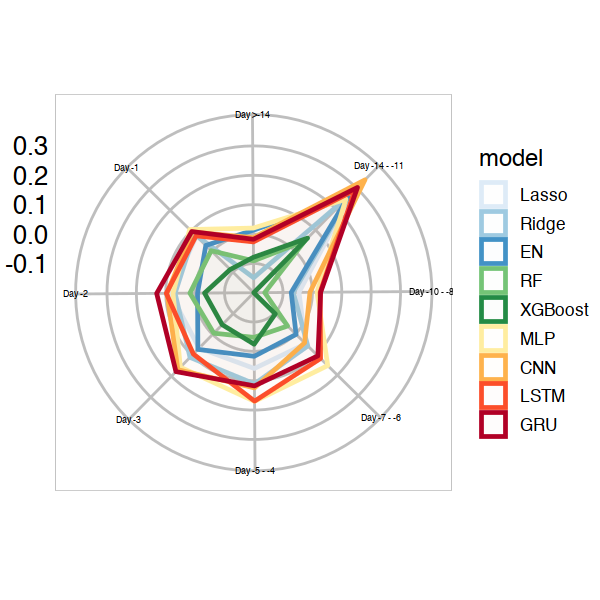

In [4]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=15),
    axis.text.y = element_text(colour = "black", size = 15, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 5, angle = 0, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.grid.major = element_line(colour = "grey", size = 0.6),
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.05),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results2_1031.csv', sep = ",", header = T, row.names = NULL)
data <- data %>% filter(para == 'whole_spc+weight+cells+conductivity+parity')
data <- subset(data, select = c(Specificity, model, day))
colnames(data) <- c('value', 'model', 'day')
data <- data %>% group_by(model, day) %>% 
  summarise(mean=mean(value))

data_14 <- data %>% filter(day == 'Day >-14')
data_14$mean = (data_14$mean - data_14[data_14$model == 'PLS-DA', 'mean', drop = TRUE])/data_14[data_14$model == 'PLS-DA', 'mean', drop = TRUE] 
data_14 <- data_14 %>% filter(model != 'PLS-DA')
data_14 <- subset(data_14, select = c(model, mean))
colnames(data_14) <- c('model', 'value')
data_14$group <- 'Day >-14'

data_11 <- data %>% filter(day == 'Day -14 - -11')
data_11$mean = (data_11$mean - data_11[data_11$model == 'PLS-DA', 'mean', drop = TRUE])/data_11[data_11$model == 'PLS-DA', 'mean', drop = TRUE] 
data_11 <- data_11 %>% filter(model != 'PLS-DA')
data_11 <- subset(data_11, select = c(model, mean))
colnames(data_11) <- c('model', 'value')
data_11$group <- 'Day -14 - -11'

data_8 <- data %>% filter(day == 'Day -10 - -8')
data_8$mean = (data_8$mean - data_8[data_8$model == 'PLS-DA', 'mean', drop = TRUE])/data_8[data_8$model == 'PLS-DA', 'mean', drop = TRUE] 
data_8 <- data_8 %>% filter(model != 'PLS-DA')
data_8 <- subset(data_8, select = c(model, mean))
colnames(data_8) <- c('model', 'value')
data_8$group <- 'Day -10 - -8'

data_6 <- data %>% filter(day == 'Day -7 - -6')
data_6$mean = (data_6$mean - data_6[data_6$model == 'PLS-DA', 'mean', drop = TRUE])/data_6[data_6$model == 'PLS-DA', 'mean', drop = TRUE] 
data_6 <- data_6 %>% filter(model != 'PLS-DA')
data_6 <- subset(data_6, select = c(model, mean))
colnames(data_6) <- c('model', 'value')
data_6$group <- 'Day -7 - -6'

data_4 <- data %>% filter(day == 'Day -5 - -4')
data_4$mean = (data_4$mean - data_4[data_4$model == 'PLS-DA', 'mean', drop = TRUE])/data_4[data_4$model == 'PLS-DA', 'mean', drop = TRUE] 
data_4 <- data_4 %>% filter(model != 'PLS-DA')
data_4 <- subset(data_4, select = c(model, mean))
colnames(data_4) <- c('model', 'value')
data_4$group <- 'Day -5 - -4'

data_3 <- data %>% filter(day == 'Day -3')
data_3$mean = (data_3$mean - data_3[data_3$model == 'PLS-DA', 'mean', drop = TRUE])/data_3[data_3$model == 'PLS-DA', 'mean', drop = TRUE] 
data_3 <- data_3 %>% filter(model != 'PLS-DA')
data_3 <- subset(data_3, select = c(model, mean))
colnames(data_3) <- c('model', 'value')
data_3$group <- 'Day -3'

data_2 <- data %>% filter(day == 'Day -2')
data_2$mean = (data_2$mean - data_2[data_2$model == 'PLS-DA', 'mean', drop = TRUE])/data_2[data_2$model == 'PLS-DA', 'mean', drop = TRUE] 
data_2 <- data_2 %>% filter(model != 'PLS-DA')
data_2 <- subset(data_2, select = c(model, mean))
colnames(data_2) <- c('model', 'value')
data_2$group <- 'Day -2'

data_1 <- data %>% filter(day == 'Day -1')
data_1$mean = (data_1$mean - data_1[data_1$model == 'PLS-DA', 'mean', drop = TRUE])/data_1[data_1$model == 'PLS-DA', 'mean', drop = TRUE] 
data_1 <- data_1 %>% filter(model != 'PLS-DA')
data_1 <- subset(data_1, select = c(model, mean))
colnames(data_1) <- c('model', 'value')
data_1$group <- 'Day -1'

data <- rbind(data_14, data_11, data_8, data_6, data_4, data_3, data_2, data_1)
data$group <- factor(data$group, levels=c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1"))
data$model <- factor(data$model, levels=c('Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data, aes(x = group, y = value, color = model, group = model)) +
  geom_polygon(aes(fill = model), size = 1, alpha = 0.01, linewidth = 1) + 
  coord_radar(start = -0.40) +  
  scale_fill_manual(values=c('#DEEBF7', '#9ECAE1', '#4292C6', '#74C476', '#238B45', '#FFEDA0', '#FEB24C', '#FC4E2A', '#B10026')) + 
  scale_color_manual(values=c('#DEEBF7', '#9ECAE1', '#4292C6', '#74C476', '#238B45', '#FFEDA0', '#FEB24C', '#FC4E2A', '#B10026')) + 
  main_theme